Parsed with column specification:
cols(
  X1 = col_integer(),
  `Unnamed: 0` = col_integer(),
  `Unnamed: 0.1` = col_integer(),
  `Unnamed: 0.1.1` = col_integer(),
  `Unnamed: 0.1.1.1` = col_integer(),
  `Unnamed: 0.1.1.1.1` = col_integer(),
  `Unnamed: 0.1.1.1.1.1` = col_double(),
  tempMean = col_double(),
  psalMean = col_double(),
  tempStd = col_double(),
  psalStd = col_double(),
  startDate = col_date(format = ""),
  endDate = col_date(format = ""),
  nProf = col_double()
)


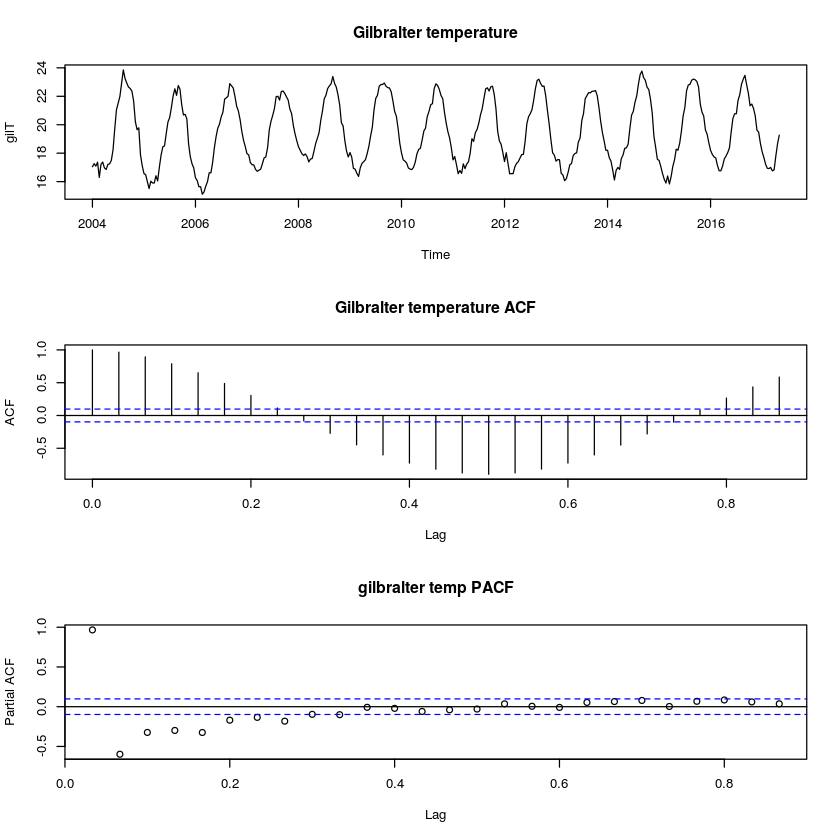

In [1]:
library(readr)
options( warn = -1 )
gilbralter <- read_csv("gilbralter.csv")
gilT <- ts(gilbralter$tempMean, start=c(2004,1,13), end=c(2017, 11, 25), frequency=30)
par(mfrow=c(3,1))
plot(gilT, main="Gilbralter temperature")
acf(gilT, main= "Gilbralter temperature ACF")
pacf(gilT, type="partial", main="gilbralter temp PACF")

In [5]:
library(forecast)
decomp = stl(gilT, s.window="periodic") # breaks series into seasons
desGilT <- seasadj(decomp) # attempts to remove seasonal trend

In [4]:
desGilbralter <- read_csv("desGilT.csv")
desGilT <- ts(desGilbralter, start=c(2004,1,13), end=c(2017, 11, 25), frequency=30)

Parsed with column specification:
cols(
  ts = col_double()
)


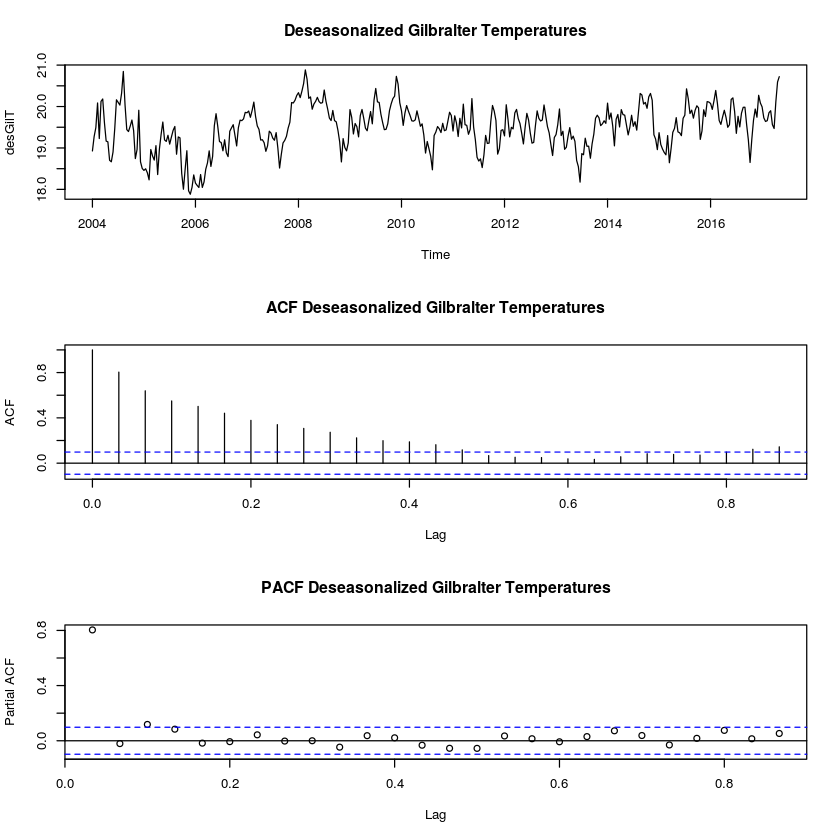

In [6]:
par(mfrow=c(3,1))
plot(desGilT, main="Deseasonalized Gilbralter Temperatures")
acf(desGilT, main= "ACF Deseasonalized Gilbralter Temperatures")
pacf(desGilT, type="partial", main="PACF Deseasonalized Gilbralter Temperatures")


Call:
arima(x = desGilT, order = c(1, 0, 0), method = "CSS")

Coefficients:
         ar1  intercept
      0.8144    19.5102
s.e.  0.0294     0.0849

sigma^2 estimated as 0.09947:  part log likelihood = -106.27


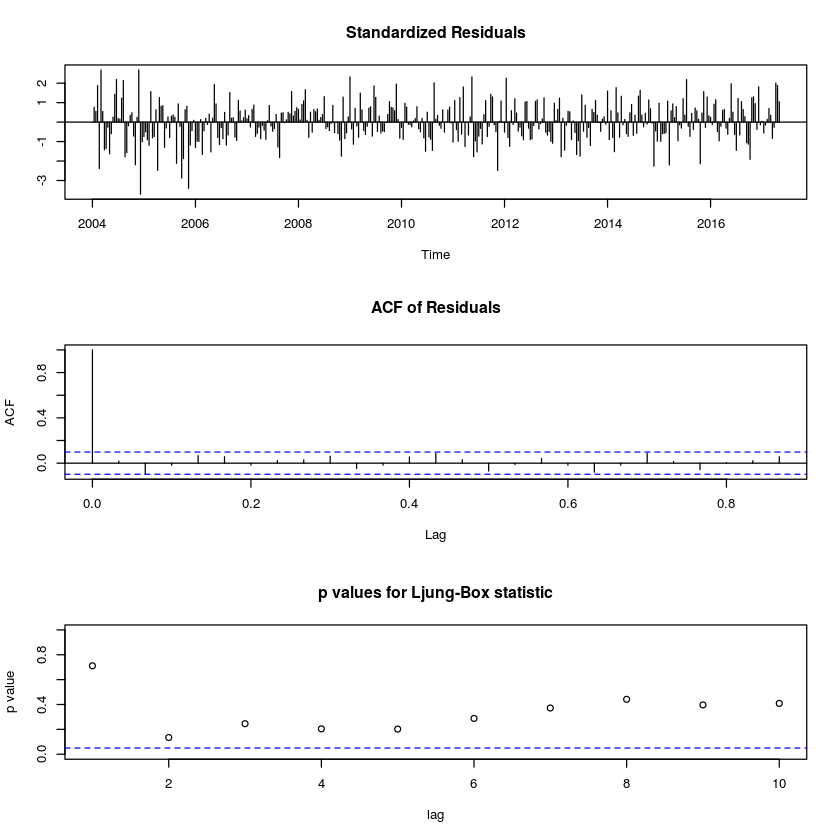

In [42]:
fit1 <- arima(desGilT, order=c(1,0,0), method="CSS")
print(fit1)
tsdiag(fit1)
myRes1 <- residuals(fit1)